# Darstellung der Signale

## Kurze Beschreibung

Im Rahmen der Lehrveranstaltung Schaltkreisentwurf sollte ein Programmierprojekt in VHDl mit dem Programm Xilinx ISE 14.7 erstellt werden. In dem Projekt handelt es sich um eine digitale Signalverarbeitung mit FIR-Algorithmus (Finite State Response). Diese Signalverarbeitungsalgorithmus wurde auf das EKG-Signal eingesetzt. Dafür nahm man ein EKG-Signal im Medizinlabor mit polarisierbaren Elektroden (Edelstahlplatten) auf. Dieser Datensatz wurde in VHDL Simulation eingelesen, verarbeitet und ausgegeben. 

Im unterem Block sind die einzelnen Signale zu erkennen. Das Störsignal wurde einfach numerisch dazu addiert.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

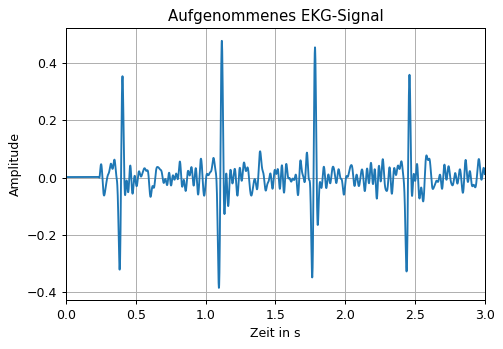

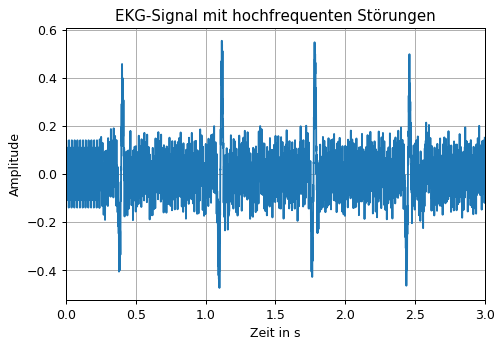

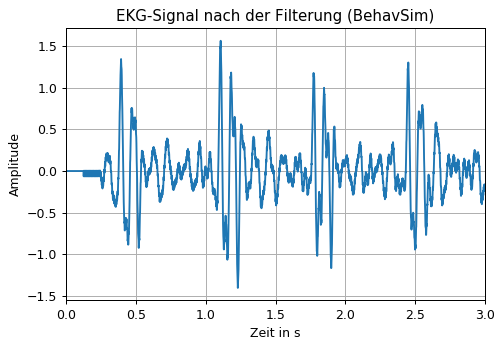

In [11]:
"""
    Tiefpassordnung     =            128
    Abtastfrequenz   fs =         1000Hz
    Cut-Off Frequenc fc =          100Hz
    Filtertyp           =            FIR
    Fenster             = blackmanharris
"""
# Zeitpunktbetrachtung
time_start = 0
time_end   = 3

# Importiere zweite Spalte aus der Textdatei und erzeuge Zeitschritte in dt = 1 ms
EKG_Signal = np.loadtxt("EKG_aufgenommen.txt", usecols = 1)
time = np.arange(len(EKG_Signal))/1000

# Frequenzen = 200Hz, 300Hz,400Hz, 450Hz
Störsignal = 0.05*np.sin(2*np.pi*200*time) + 0.05*np.sin(2*np.pi*300*time) + 0.05*np.sin(2*np.pi*400*time)+ 0.05*np.sin(2*np.pi*450*time)
# Überlagerung
EKG_Störsignal = EKG_Signal + Störsignal

# Darstellung aufgenommenes EKG-Signal
plt.figure(num=None, figsize=(6, 4), dpi=90, facecolor='w', edgecolor='k')
plt.plot(time, EKG_Signal)
plt.title("Aufgenommenes EKG-Signal")
plt.xlabel("Zeit in s")
plt.xlim(time_start,time_end)
plt.ylabel("Amplitude")
plt.grid(True)

# Darstellung aufgenommenes EKG-Signal + Störsignale
plt.figure(num=None, figsize=(6, 4), dpi=90, facecolor='w', edgecolor='k')
plt.plot(time, EKG_Störsignal)
plt.title("EKG-Signal mit hochfrequenten Störungen")
plt.xlabel("Zeit in s")
plt.xlim(time_start,time_end)
plt.ylabel("Amplitude")
plt.grid(True)

# Importiere EKG-Signal, skaliere sie runter und erzeuge Zeitschritte in dt = 1ms
EKG_nach_FPGA = np.loadtxt("EKG_nach_FPGA.txt")/1000
time2 = np.arange(len(EKG_nach_FPGA))/1000

# Darstellung aufgenommenes EKG-Signal nach FPGA-Simulation
plt.figure(num=None, figsize=(6, 4), dpi=90, facecolor='w', edgecolor='k')
plt.plot(time2, EKG_nach_FPGA)
plt.title("EKG-Signal nach der Filterung (BehavSim)")
plt.xlabel("Zeit in s")
plt.xlim(time_start,time_end)
plt.ylabel("Amplitude")
plt.grid(True)

plt.show()

## Anmerkung
### Bei zu wenigen Filterkoeffizienten:
- Keine genaue Filterung, speziell bei kleine Bandbreite und niedrige Frequenzen
- Filterung von Offset und niederfrequente Driftschwankungen nicht möglich, deswegen Datensatzwechsel

### Bei zu vielen Filterkoeffizienten:
- Lange Simulationszeiten
- Filterung von Offset und niederfrequente Driftschwankungen kaum möglich
- Rechnen mit Festkommazahlen führt oft zu Überlauf
- Viele Bauteile werden verwendet

## Ergebnis:

Der Filter schafft es den hochfrequenten Teil einigermaßen zu entfernen. Das Signal reicht für anderes Projekt - den **QRS-Detektor** - aus. Die Anforderungen für ein EKG-Signal würde es nicht erfüllen. Entweder muss der implementierte Algorithmus verbessert oder auf eine andere Filterstruktur zugegriffen werden.